# Problem Statement

Customer segmentation lies at the heart of every consumer facing business nowadays which involves being able to identify different types of customers and then figuring out ways to find more of those individuals so you can… you guessed it, get more customers!

In this assessment, you'll be doing exactly that, albeit with the help of K-Means clustering and observe how you can form groups of customers exhibiting similar behaviour.


# Feature description 
Feature	- Description<br>
1) Offer #	Order ID<br>
2) Campaign	Month of the campaign<br>
3) Varietal	Grape variety<br>
4) Minimum Qty(kg)	Minimum quantity ordered in kgs<br>
5) Discount(%)	Discount on that order<br>
6) Origin	Country where the variety of grape is grown<br>
7) Past Peak	If wine flavor has faded<br>

In [366]:
# import packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [367]:
# Load Offers
Offers = pd.read_excel('./data/file.xlsx', sheet_name=0)

# Load Transactions
transactions = pd.read_excel('./data/file.xlsx', sheet_name=1)
transactions['n'] = 1

In [368]:
Offers.head(2)

,Offer #,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False


In [369]:
transactions.head(2)


,Customer Last Name,Offer #,n
0,Smith,2,1
1,Smith,24,1


In [370]:
print(Offers.shape)
print(transactions.shape)

(32, 7)
(324, 3)


In [371]:
df = Offers.merge(transactions)
df.head(5)

,Offer #,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak,Customer Last Name,n
0,1,January,Malbec,72,56,France,False,Thomas,1
1,1,January,Malbec,72,56,France,False,Jackson,1
2,1,January,Malbec,72,56,France,False,Mitchell,1
3,1,January,Malbec,72,56,France,False,Peterson,1
4,1,January,Malbec,72,56,France,False,Wood,1


In [372]:
df.shape

(324, 9)

In [373]:
# create pivot table
matrix = df.pivot_table(index='Customer Last Name', columns='Offer #', values='n')
matrix.head()

Offer #,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
Customer Last Name,,,,,,,,,,,,,,,,,,,,,
Adams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
Allen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Anderson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Bailey,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Baker,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [374]:
matrix.fillna(0, inplace=True)
matrix.head()

Offer #,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
Customer Last Name,,,,,,,,,,,,,,,,,,,,,
Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [375]:
matrix.reset_index(inplace=True)
matrix.head()

Offer #,Customer Last Name,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [376]:
matrix.shape

(100, 33)

In [377]:
cluster = KMeans(init="k-means++", n_clusters=5, n_init=10, max_iter=300, random_state=0)

In [378]:
matrix['cluster'] = cluster.fit_predict(matrix[matrix.columns[1:]])

In [379]:
matrix.head()

Offer #,Customer Last Name,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,cluster
0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1
1,Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2


In [380]:
matrix.shape

(100, 34)

In [381]:
# PCA
pca = PCA(n_components=2, random_state=43)


In [382]:
matrix['x'] = pca.fit_transform(matrix[matrix.columns[1:]])[:,0]
matrix['y'] = pca.fit_transform(matrix[matrix.columns[1:]])[:,1]

In [383]:
matrix.head()

Offer #,Customer Last Name,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,cluster,x,y
0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1,-0.872239,-0.849723
1,Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,-1.648094,0.489293
2,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2.470870,-0.333795
3,Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,-0.804125,-0.555772
4,Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,0.272535,-0.006274


In [384]:
clusters = matrix.iloc[:]
clusters.shape

(100, 36)

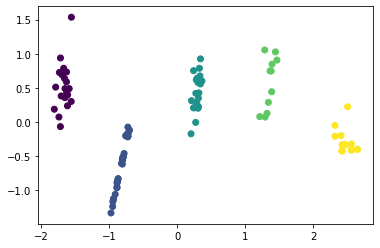

In [385]:
plt.scatter(x=matrix['x'], y=matrix['y'], c=matrix.cluster, cmap='viridis')

In [386]:
df = Offers.merge(transactions)

In [387]:
clusters.head()

Offer #,Customer Last Name,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,cluster,x,y
0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1,-0.872239,-0.849723
1,Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,-1.648094,0.489293
2,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2.470870,-0.333795
3,Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,-0.804125,-0.555772
4,Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,0.272535,-0.006274


In [388]:
transactions.head()

,Customer Last Name,Offer #,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


In [389]:
data = clusters.merge(transactions, on='Customer Last Name')

In [393]:
data = data.merge(Offers)
data.shape

(324, 44)

In [395]:
champagne = {}

for i in data.cluster.unique():
    new_df = data[data.cluster == i]  
    counts = new_df['Varietal'].value_counts(ascending=False)
    if (counts.index[0] == 'Champagne') :
        champagne[i]=counts[0]

cluster_champagne = max(champagne, key=champagne.get)
cluster_champagne


2

In [394]:
discount = {}

for i in data.cluster.unique():
    new_df = data[data.cluster == i] 
    print(new_df['Discount (%)'].sum())
    counts = new_df['Discount (%)'].sum()/len(new_df)
    discount[i] = counts

print(discount)
cluster_discount = max(discount, key=discount.get) 
print(cluster_discount)

4860
5233
4152
2967
2060
{1: 55.22727272727273, 2: 63.81707317073171, 0: 68.06557377049181, 3: 58.1764705882353, 4: 49.04761904761905}
0
